In [21]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [22]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

In [23]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# encoded.shape = (4, 4, 8)

In [24]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [25]:
autoencoder = Model(input_img, decoded)

In [26]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [27]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [28]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [29]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2095 - val_loss: 0.1659
Epoch 2/100
60000/60000 [==============================] - 144s 2ms/step - loss: 0.1558 - val_loss: 0.1458
Epoch 3/100
60000/60000 [==============================] - 105s 2ms/step - loss: 0.1406 - val_loss: 0.1369
Epoch 4/100
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1330 - val_loss: 0.1309
Epoch 5/100
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1281 - val_loss: 0.1258
Epoch 6/100
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1243 - val_loss: 0.1220
Epoch 7/100
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1214 - val_loss: 0.1159
Epoch 8/100
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1193 - val_loss: 0.1221
Epoch 9/100
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1177 - val_loss: 

60000/60000 [==============================] - 56s 929us/step - loss: 0.0970 - val_loss: 0.0954
Epoch 77/100
60000/60000 [==============================] - 56s 929us/step - loss: 0.0970 - val_loss: 0.0980
Epoch 78/100
60000/60000 [==============================] - 56s 937us/step - loss: 0.0969 - val_loss: 0.0956
Epoch 79/100
60000/60000 [==============================] - 56s 929us/step - loss: 0.0968 - val_loss: 0.0943
Epoch 80/100
60000/60000 [==============================] - 56s 930us/step - loss: 0.0967 - val_loss: 0.0942
Epoch 81/100
60000/60000 [==============================] - 56s 929us/step - loss: 0.0967 - val_loss: 0.0945
Epoch 82/100
60000/60000 [==============================] - 56s 931us/step - loss: 0.0963 - val_loss: 0.0960
Epoch 83/100
60000/60000 [==============================] - 56s 932us/step - loss: 0.0965 - val_loss: 0.0965
Epoch 84/100
60000/60000 [==============================] - 56s 938us/step - loss: 0.0965 - val_loss: 0.0946
Epoch 85/100
60000/60000 [======

In [30]:
decoded_imgs = autoencoder.predict(x_test)

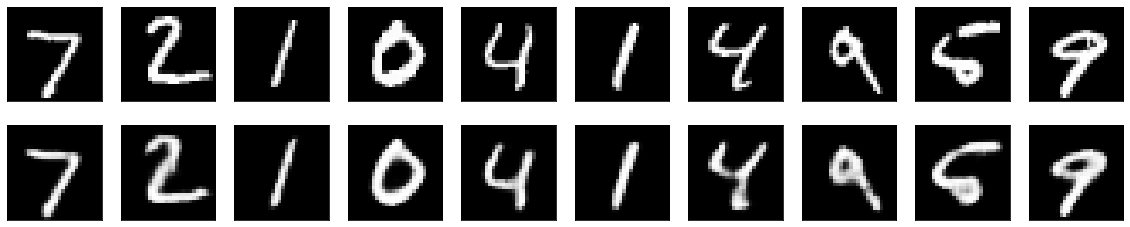

In [31]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()